In [19]:
import pandas as pd

# Load the dataset
file_path = 'AbdulRahman_Chocolate Rating.csv'
chocolate_df = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
chocolate_df.head()


,REF,Company Name,CompanyLocation_Country,Review Date,Bean Origin,ChocolateName,Cocoa_Percent,No_of_ingredients,Rating
0,1502,Sirene,Canada,2015,Madagascar,"Somia Plantation, 2012",100,1,1.75
1,1506,Sirene,Canada,2015,Ecuador,"Camino Verde P., Balao, Guayas, 2012",100,1,1.75
2,1205,Habitual,Canada,2014,Blend,one hundred,100,1,1.75
3,266,Pacari,Ecuador,2008,Ecuador,Raw,100,1,1.75
4,341,Bouga Cacao (Tulicorp),Ecuador,2009,Ecuador,"El Oro, Hacienda de Oro",100,1,1.75


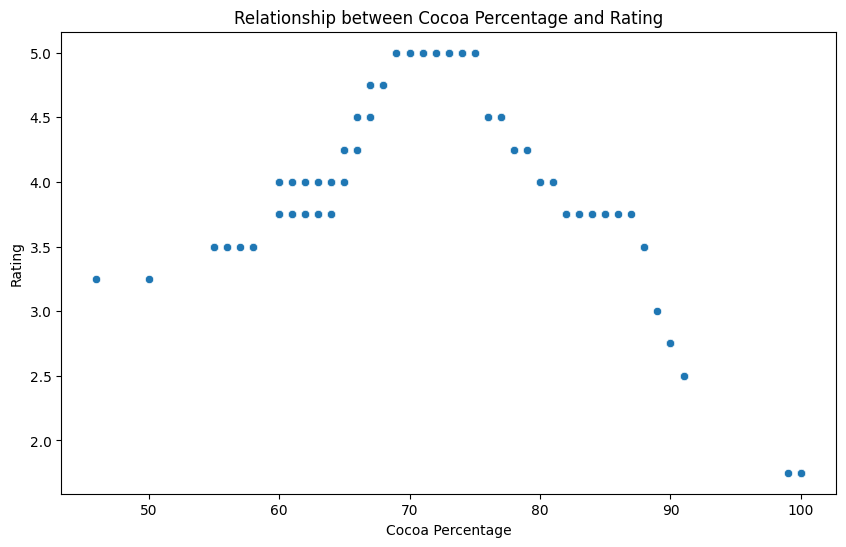

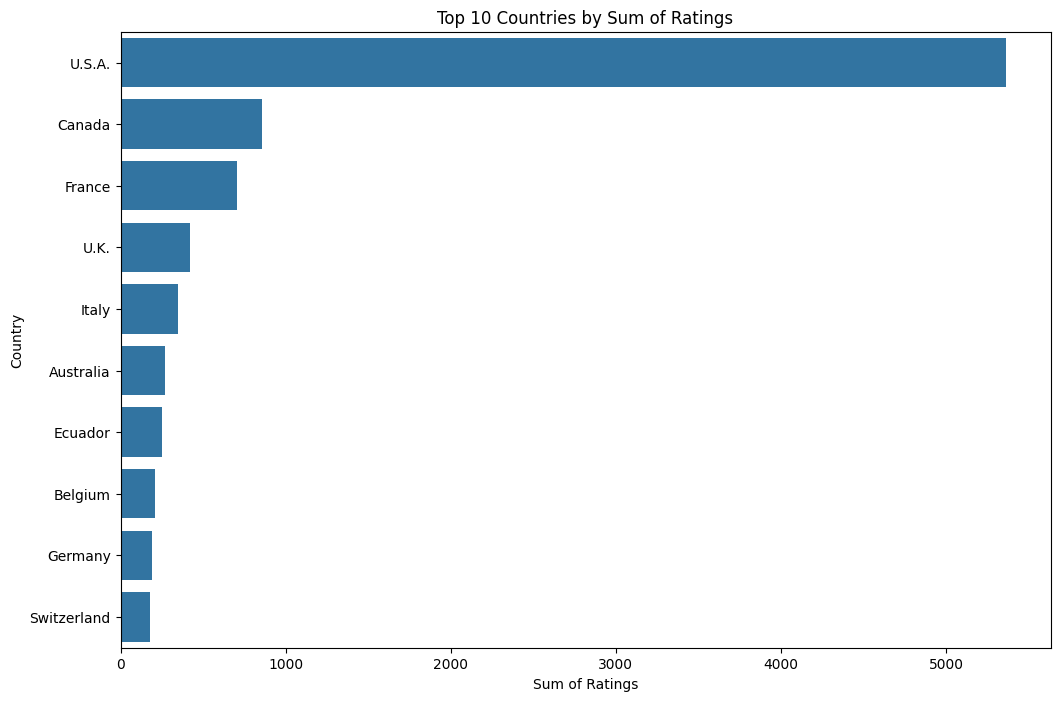

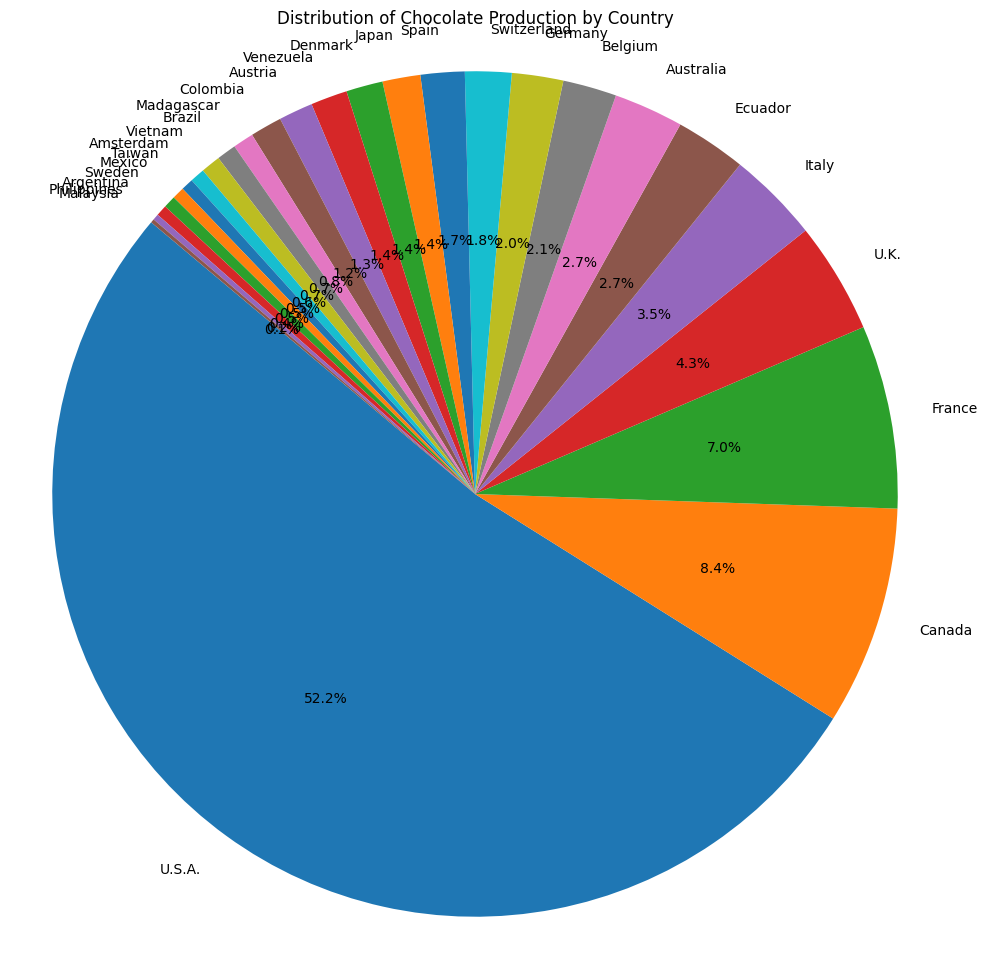

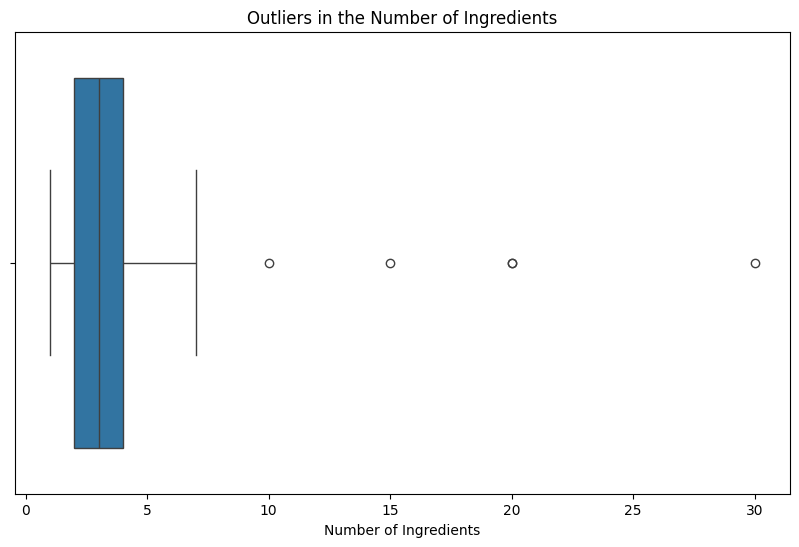

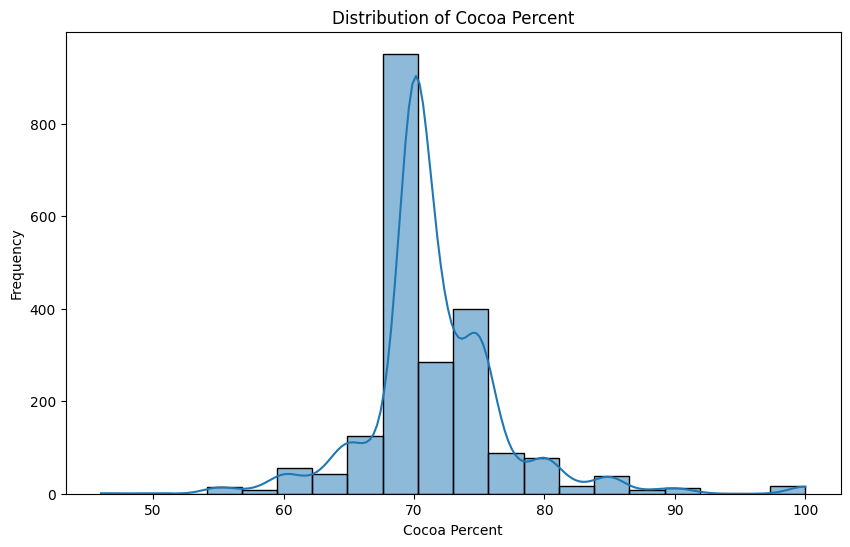

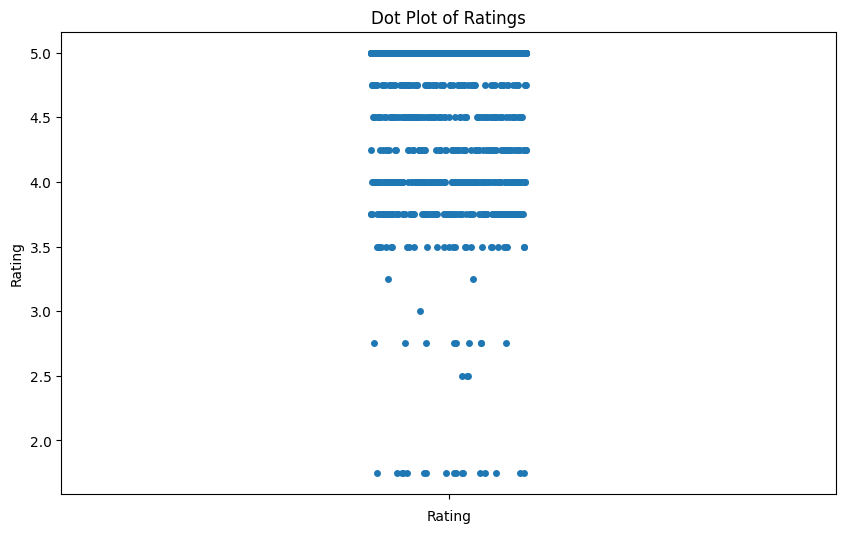

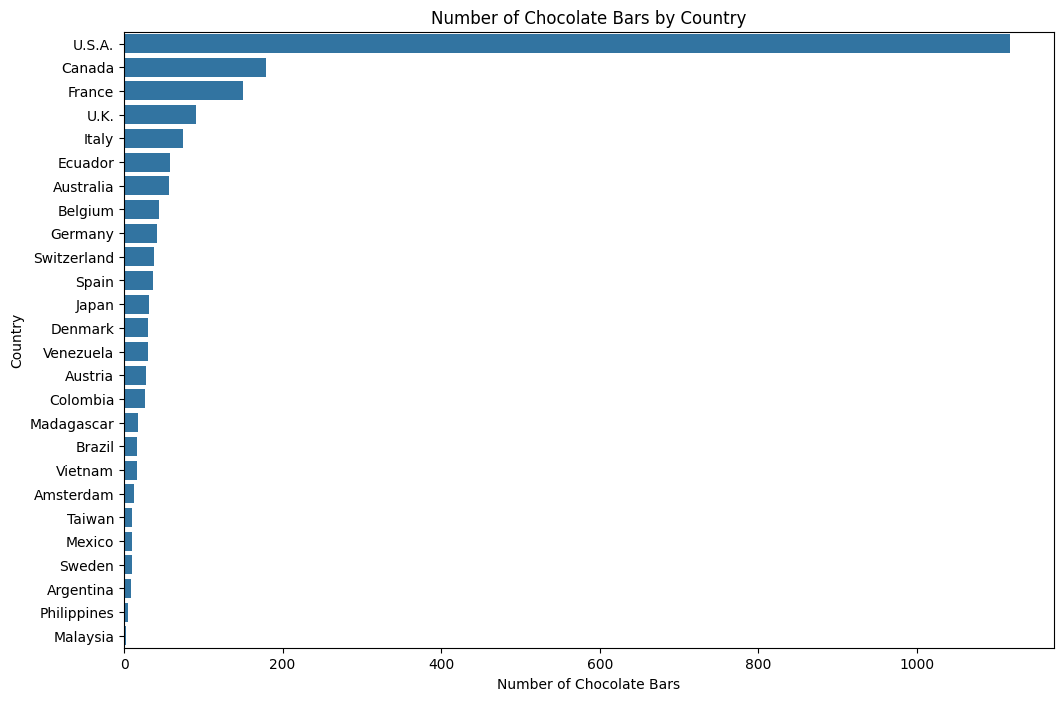

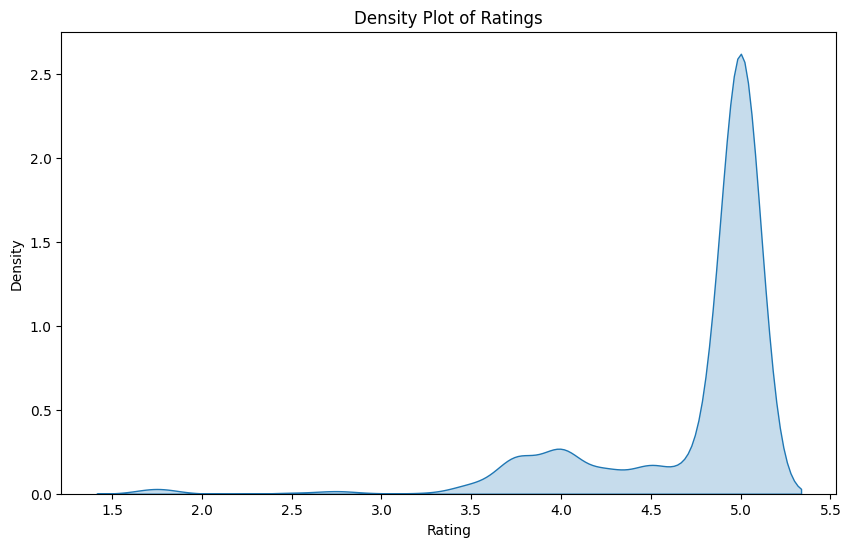

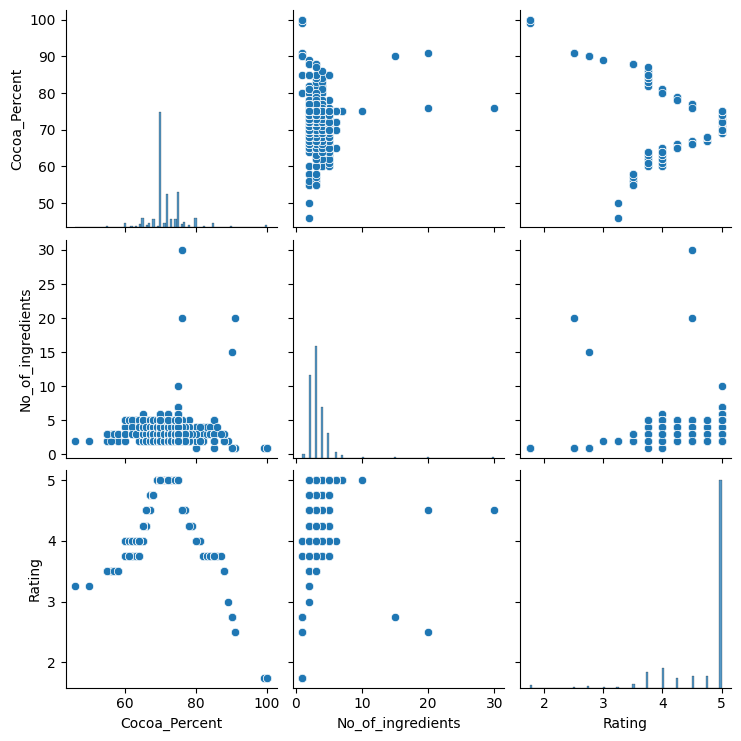

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Relationship between Cocoa Percentage and Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(data=chocolate_df, x='Cocoa_Percent', y='Rating')
plt.title('Relationship between Cocoa Percentage and Rating')
plt.xlabel('Cocoa Percentage')
plt.ylabel('Rating')
plt.savefig('Cocoa_Percentage_vs_Rating.png')
plt.show()

# 2. Identify Countries with the Highest Rated Chocolate Bars
country_ratings = chocolate_df.groupby('CompanyLocation_Country')['Rating'].sum().sort_values(ascending=False)
top_countries = country_ratings.head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title('Top 10 Countries by Sum of Ratings')
plt.xlabel('Sum of Ratings')
plt.ylabel('Country')
plt.savefig('Top_Countries_by_Ratings.png')
plt.show()

# 3. Pie Chart of Chocolate Production by Country
country_counts = chocolate_df['CompanyLocation_Country'].value_counts()
plt.figure(figsize=(12, 12))
plt.pie(country_counts, labels=country_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Chocolate Production by Country')
plt.axis('equal')
plt.savefig('Chocolate_Production_by_Country.png')
plt.show()

# 4. Outliers in the Number of Ingredients
plt.figure(figsize=(10, 6))
sns.boxplot(x=chocolate_df['No_of_ingredients'])
plt.title('Outliers in the Number of Ingredients')
plt.xlabel('Number of Ingredients')
plt.savefig('Outliers_in_Number_of_Ingredients.png')
plt.show()

# 5. Distribution of Cocoa Percent
plt.figure(figsize=(10, 6))
sns.histplot(chocolate_df['Cocoa_Percent'], bins=20, kde=True)
plt.title('Distribution of Cocoa Percent')
plt.xlabel('Cocoa Percent')
plt.ylabel('Frequency')
plt.savefig('Distribution_of_Cocoa_Percent.png')
plt.show()

# 6. Dot Plot for Rating
plt.figure(figsize=(10, 6))
sns.stripplot(y=chocolate_df['Rating'])
plt.title('Dot Plot of Ratings')
plt.xlabel('Rating')
plt.savefig('Dot_Plot_Ratings.png')
plt.show()

# 7. Bar Plot for Number of Chocolate Bars by Country
plt.figure(figsize=(12, 8))
sns.barplot(x=country_counts.values, y=country_counts.index)
plt.title('Number of Chocolate Bars by Country')
plt.xlabel('Number of Chocolate Bars')
plt.ylabel('Country')
plt.savefig('Number_of_Chocolate_Bars_by_Country.png')
plt.show()

# 8. Density Plot for Rating
plt.figure(figsize=(10, 6))
sns.kdeplot(chocolate_df['Rating'], fill=True)
plt.title('Density Plot of Ratings')
plt.xlabel('Rating')
plt.ylabel('Density')
plt.savefig('Density_Plot_Ratings.png')
plt.show()

# 9. Pairwise Relationships
sns.pairplot(chocolate_df[['Cocoa_Percent', 'No_of_ingredients', 'Rating']])
plt.savefig('Pairwise_Relationships.png')
plt.show()


In [22]:
# Check the data types of the columns
chocolate_df.dtypes


REF                          int64
Company Name                object
CompanyLocation_Country     object
Review Date                  int64
Bean Origin                 object
ChocolateName               object
Cocoa_Percent                int64
No_of_ingredients            int64
Rating                     float64
dtype: object

In [23]:
# Check for NaNs or infinite values in the Rating column
chocolate_df['Rating'].isnull().sum(), chocolate_df['Rating'].apply(lambda x: not (pd.isna(x) or pd.isnull(x) or (x in [float('inf'), float('-inf')]))).all()


(0, True)

In [24]:
# Inspect unique values in the Rating column
unique_ratings = chocolate_df['Rating'].unique()
unique_ratings


array([1.75, 2.5 , 2.75, 3.  , 3.25, 3.5 , 3.75, 4.  , 4.25, 4.5 , 4.75,
       5.  ])

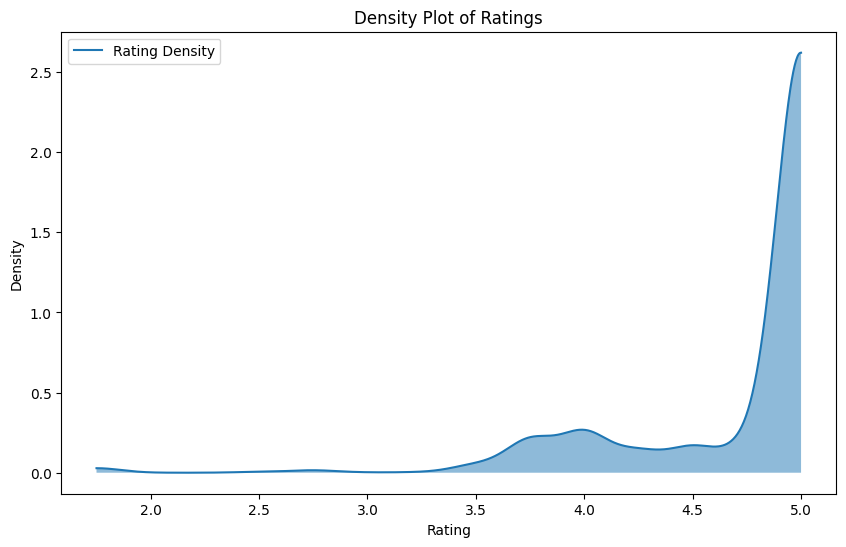

In [28]:
from scipy.stats import gaussian_kde
import numpy as np

# Density plot using matplotlib directly
plt.figure(figsize=(10, 6))
density = gaussian_kde(chocolate_df['Rating'])
x = np.linspace(min(chocolate_df['Rating']), max(chocolate_df['Rating']), 1000)
plt.plot(x, density(x), label='Rating Density')
plt.fill_between(x, density(x), alpha=0.5)
plt.title('Density Plot of Ratings')
plt.xlabel('Rating')
plt.ylabel('Density')
plt.legend()
plt.savefig('Density_Plot_Ratings.png')
plt.show()


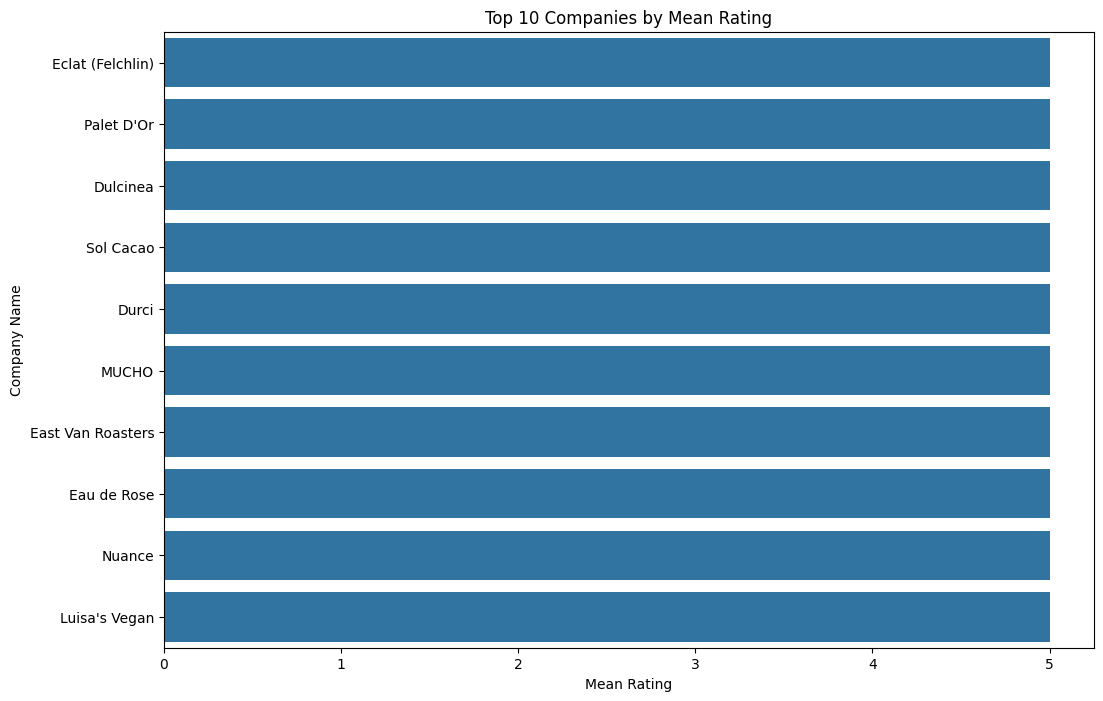

In [29]:
# Analyze and visualize the relationship between company name and ratings

# Calculate the mean rating for each company
company_ratings = chocolate_df.groupby('Company Name')['Rating'].mean().sort_values(ascending=False)

# Display the top 10 companies by mean rating
top_companies = company_ratings.head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_companies.values, y=top_companies.index)
plt.title('Top 10 Companies by Mean Rating')
plt.xlabel('Mean Rating')
plt.ylabel('Company Name')
plt.savefig('Top_Companies_by_Mean_Rating.png')
plt.show()


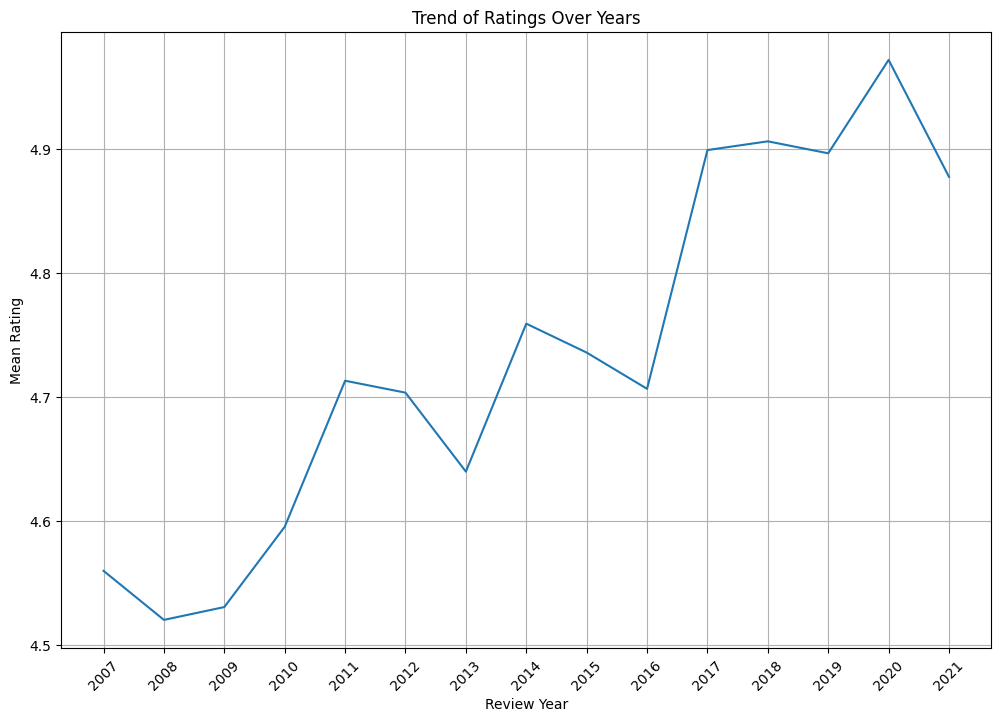

In [30]:
# Analyze the trend of ratings over the years

# Calculate the mean rating for each year
yearly_ratings = chocolate_df.groupby('Review Date')['Rating'].mean().sort_index()

plt.figure(figsize=(12, 8))
sns.lineplot(x=yearly_ratings.index, y=yearly_ratings.values)
plt.title('Trend of Ratings Over Years')
plt.xlabel('Review Year')
plt.ylabel('Mean Rating')
plt.xticks(yearly_ratings.index, rotation=45)
plt.grid(True)
plt.savefig('Ratings_Trend_Over_Years.png')
plt.show()


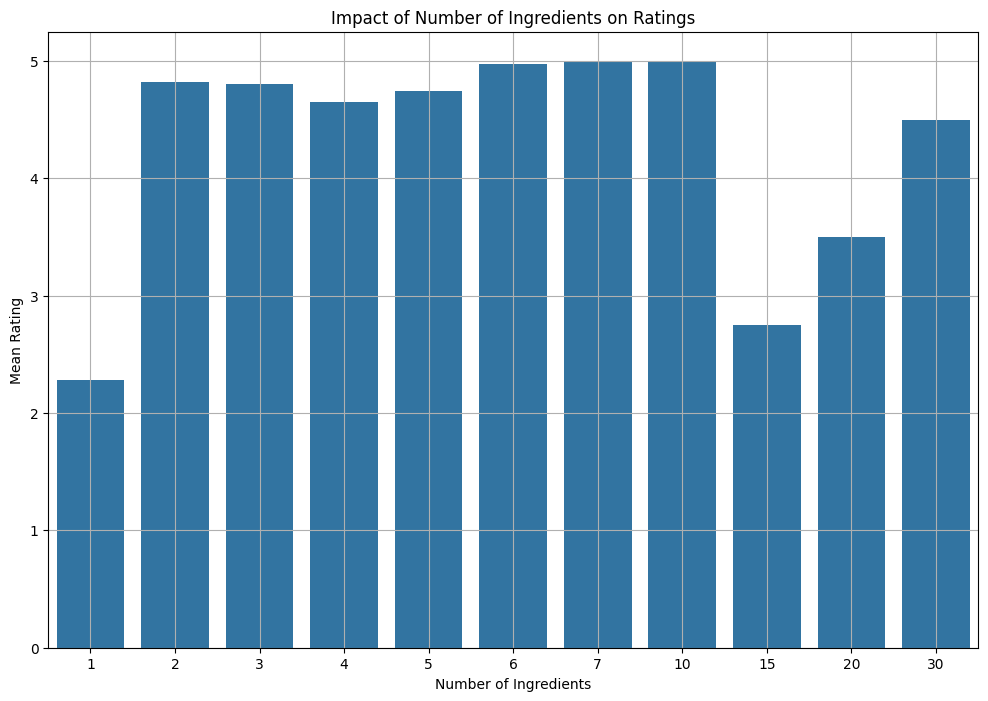

In [31]:
# Analyze the impact of the number of ingredients on ratings

# Calculate the mean rating for each number of ingredients
ingredients_ratings = chocolate_df.groupby('No_of_ingredients')['Rating'].mean().sort_index()

plt.figure(figsize=(12, 8))
sns.barplot(x=ingredients_ratings.index, y=ingredients_ratings.values)
plt.title('Impact of Number of Ingredients on Ratings')
plt.xlabel('Number of Ingredients')
plt.ylabel('Mean Rating')
plt.grid(True)
plt.savefig('Ingredients_Impact_on_Ratings.png')
plt.show()
